In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [3]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [5]:
df.Satisfaction.unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

- ID is unique so, it is of no use
- Droping the ID columns

In [6]:
df.drop("ID", axis = 1, inplace = True)

In [7]:
df.shape

(129880, 23)

## Missing Values

In [8]:
df.isna().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arrival Delay', ylabel='Density'>

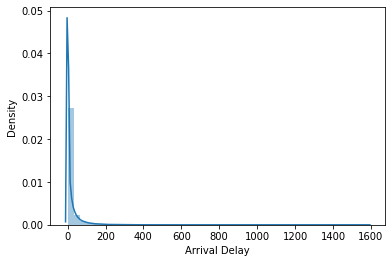

In [9]:
sns.distplot(a=df['Arrival Delay'])

- Majority is with 0 waiting time
- so I will fill the arrival time with 0

In [10]:
df['Arrival Delay'] = df['Arrival Delay'].fillna(0)

In [11]:
# Converting the target columns into integer valueable
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [12]:
df['Satisfaction'] = df['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied':0})

In [13]:
df['Satisfaction'].unique()

array([0, 1], dtype=int64)

# EDA and Feature selection

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

- I will build new dataframe inorder to not disturb the main dataframe

<AxesSubplot:>

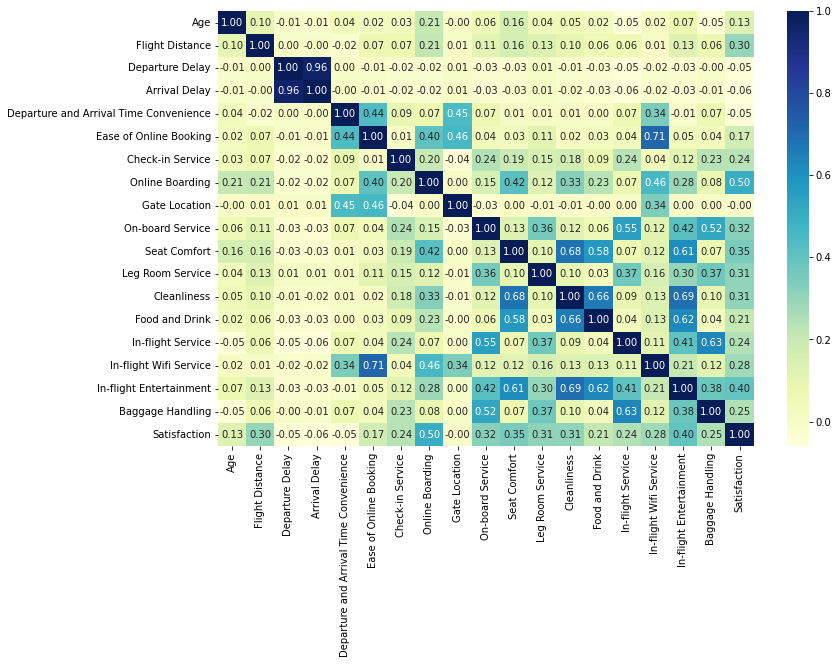

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True, fmt='1.2f', cmap='YlGnBu')

In [16]:
final_df = pd.DataFrame()

In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [18]:
plt.figure(figsize=(8, 8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [19]:
def bar(df, feature, size=(8, 6)):
    plt.figure(figsize=size)
    sns.barplot(x=feature, y='Satisfaction', data = df)
    plt.show()

## Gender

In [20]:
df['Male'] = [0 if i == 'Female' else 1 for i in df['Gender']]

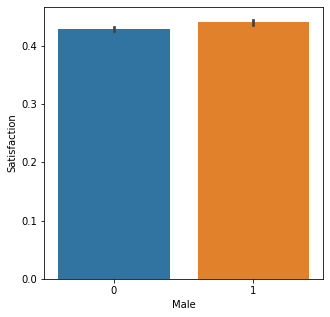

In [21]:
bar(df, 'Male', (5, 5))

- Here Gender is not creating more of impact on Target
- Average of both Gender has same impact on Target
- I will not consider the Gender in features selection

## Age

<AxesSubplot:xlabel='Satisfaction', ylabel='Age'>

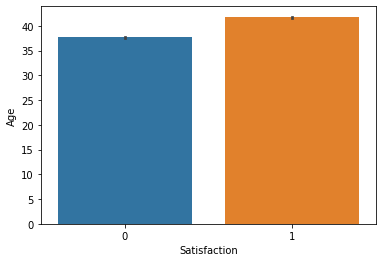

In [22]:
sns.barplot(x='Satisfaction', y='Age', data = df)

<AxesSubplot:xlabel='Age', ylabel='Satisfaction'>

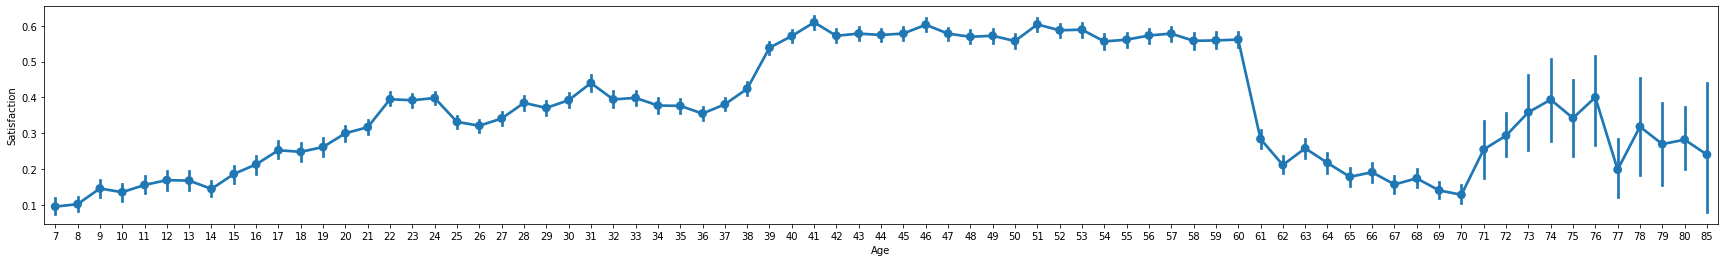

In [23]:
plt.figure(figsize=(30, 4))
sns.pointplot(x='Age', y='Satisfaction', data = df)

In [28]:
"""

Age Group:
0  - 21 : 0
21 - 39 : 1
39 - 61 : 2
61 - 71 : 3
71 +    : 4

"""
age_grp = []
for i in df['Age']:
    if i < 21:
        age_grp.append(0)
    elif i >= 21 and i < 39:
        age_grp.append(1)
    elif i >= 39 and i < 61:
        age_grp.append(2)
    elif i >= 61 and i < 71:
        age_grp.append(3)
    else:
        age_grp.append(4)

final_df['Age_Grp'] = age_grp

In [29]:
final_df.head()

,Age_Grp
0,2
1,1
2,2
3,2
4,2


## Customer type

In [31]:
df['Customer Type'].unique()

array(['First-time', 'Returning'], dtype=object)

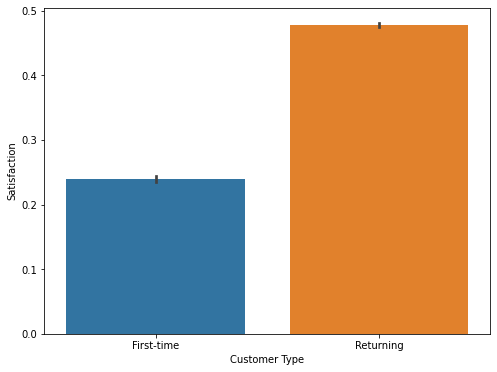

In [32]:
bar(df, 'Customer Type')

- Here returning customer is higly satisfied
- So it making sense to keep it in features

In [35]:
final_df['Returning'] = pd.get_dummies(df['Customer Type'], drop_first=True)

In [36]:
final_df.head()

,Age_Grp,Returning
0,2,0
1,1,1
2,2,1
3,2,1
4,2,1


In [37]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction', 'Male'],
      dtype='object')

## Type of travel

In [38]:
df['Type of Travel'].unique()

array(['Business', 'Personal'], dtype=object)

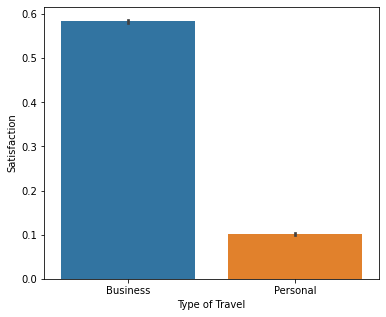

In [39]:
bar(df, 'Type of Travel', (6, 5))

- Here it is making some sense to the target values
- So keep it also.

## Class

In [40]:
df['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

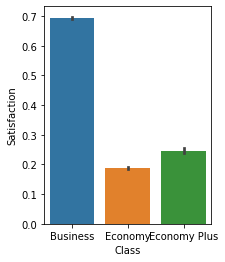

In [41]:
bar(df, 'Class', (3, 4))

- Here bussiness class creating much more difference than others.
- So i will merge the both economy class together as seperate variable

In [43]:
final_df['Class'] = [0 if i == 'Business' else 1 for i in df['Class']]

In [44]:
final_df.head()

,Age_Grp,Returning,Class
0,2,0,0
1,1,1,0
2,2,1,0
3,2,1,0
4,2,1,0


## Flight Distance

In [45]:
df['Flight Distance']

0          821
1          821
2          853
3         1905
4         3470
          ... 
129875     447
129876     308
129877     337
129878     337
129879     337
Name: Flight Distance, Length: 129880, dtype: int64

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

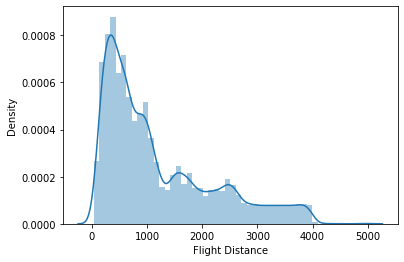

In [46]:
sns.distplot(df['Flight Distance'])

- Looks like more passengers are travelling below about 1300

<AxesSubplot:xlabel='Satisfaction', ylabel='Flight Distance'>

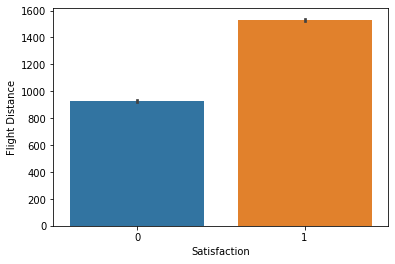

In [47]:
sns.barplot(x='Satisfaction', y='Flight Distance', data = df)

- The customer travell more are highly statisfied than who travel less
- Let's check for pointplot so that we can idea of how satisfaction varies with distance

In [51]:
print("Done")

Done
